<a href="https://colab.research.google.com/github/caasalazarsa/iot2/blob/main/object_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


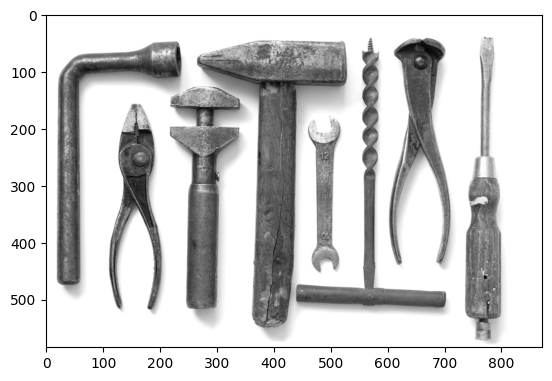

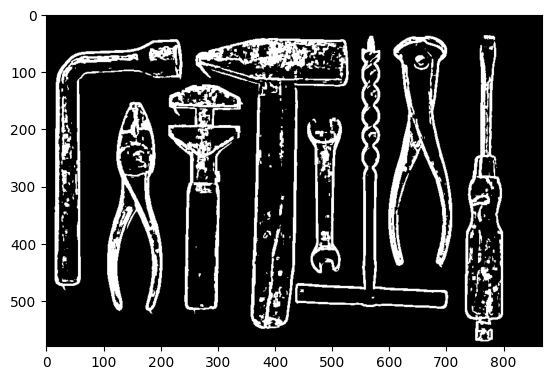

In [ ]:
from skimage import io, exposure, color, util
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

image = color.rgb2gray(io.imread('/content/drive/MyDrive/tools.jpg'))

exposure.equalize_adapthist(image)
Z = util.view_as_windows(image, (5, 5))
Z = Z.reshape(Z.shape[0], Z.shape[1], -1)
variance_map = Z.var(axis=2)

plt.imshow(image,cmap='gray')

plt.show()

plt.imshow(variance_map > 0.005, cmap='gray')
plt.savefig('tools_thresh.png')

plt.show()

sacado de: https://stackoverflow.com/questions/28047737/need-to-count-objects-on-a-white-background-in-python-shadows-cause-trouble

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
8


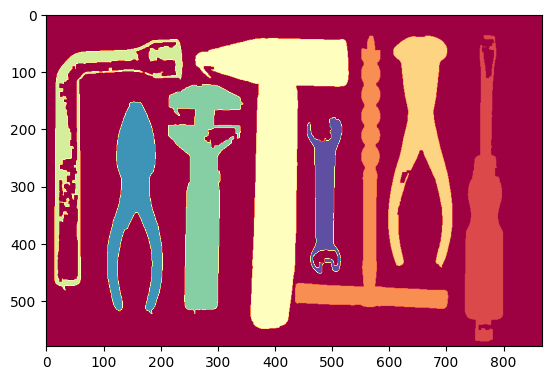

In [ ]:


from skimage import io, exposure, color, util, measure, morphology
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

image = color.rgb2gray(io.imread('/content/drive/MyDrive/tools.jpg'))

exposure.equalize_adapthist(image)
Z = util.view_as_windows(image, (5, 5))
Z = Z.reshape(Z.shape[0], Z.shape[1], -1)
variance_map = Z.var(axis=2)

tools_bw = variance_map > 0.005
tools_bw = morphology.binary_closing(tools_bw, np.ones((5, 5)))
tools_bw = ndi.binary_fill_holes(tools_bw)


labels = measure.label(tools_bw)
regions = measure.regionprops(labels)
regions = [r for r in regions if r.perimeter > 500 and r.major_axis_length > 200]

print(len(regions))

out = np.zeros_like(tools_bw, dtype=int)
for i, r in enumerate(regions):
    out[labels == r.label] = i + 1

plt.imshow(out, cmap='Spectral')
plt.savefig('tools_identified.png', bbox_inches='tight')

plt.show()